<a href="https://colab.research.google.com/github/victorjoseij/Machine_learning/blob/main/Prediction_by_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [ ]:
# Step 1: Data Preprocessing

# Load the dataset
data = pd.read_csv('/content/insurance.csv')

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Encode categorical variables (sex, smoker, region)
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# Step 2: Linear Regression Model

# Define features (X) and target variable (y)
X = data.drop(columns=['charges'])
Y = data['charges']

In [ ]:
# Step 3: Model Evaluation

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
Y_pred = model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
explained_var = explained_variance_score(Y_test, Y_pred)

In [ ]:
# Additional metrics: RSS and Adjusted R-squared
rss = np.sum((Y_pred - Y_test)**2)
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [ ]:
# Display evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')
print(f'Adjusted R-squared Score: {adj_r2:.2f}')
print(f'Residual Sum of Squares (RSS): {rss:.2f}')
print(f'Explained Variance Score: {explained_var:.2f}')

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2) Score: 0.78
Adjusted R-squared Score: 0.78
Residual Sum of Squares (RSS): 9003973448.16
Explained Variance Score: 0.78


In [ ]:
# Step 4: Feature Importance

# Get feature coefficients (importance) from the model
feature_importance = model.coef_
feature_names = X.columns

In [ ]:
# Create a DataFrame to display feature importance
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

In [ ]:
# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

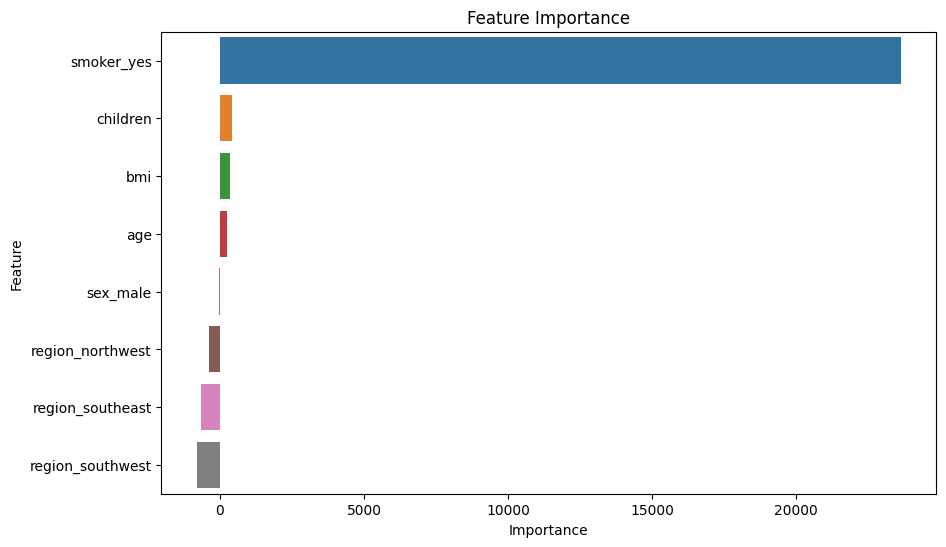

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

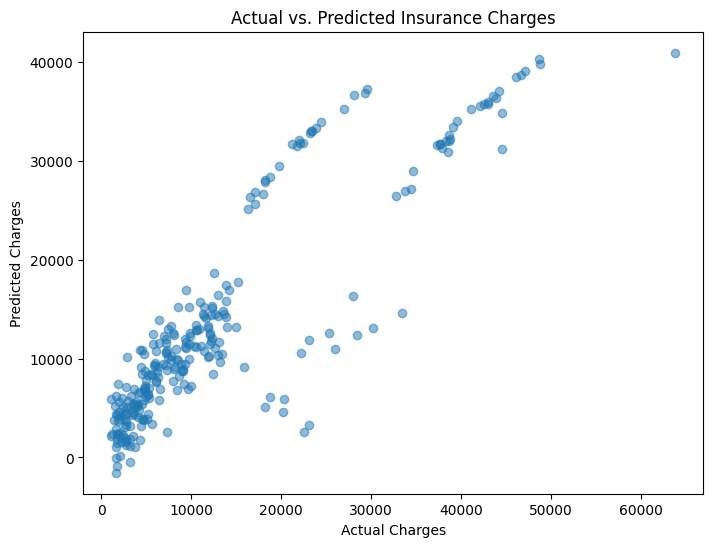

In [ ]:
# Step 5: Visualization

# Create a scatterplot of actual vs. predicted insurance charges
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.show()